<a href="https://colab.research.google.com/github/ebceran/MS-gross-profit-margin-analysis/blob/main/ms_financials_2024_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

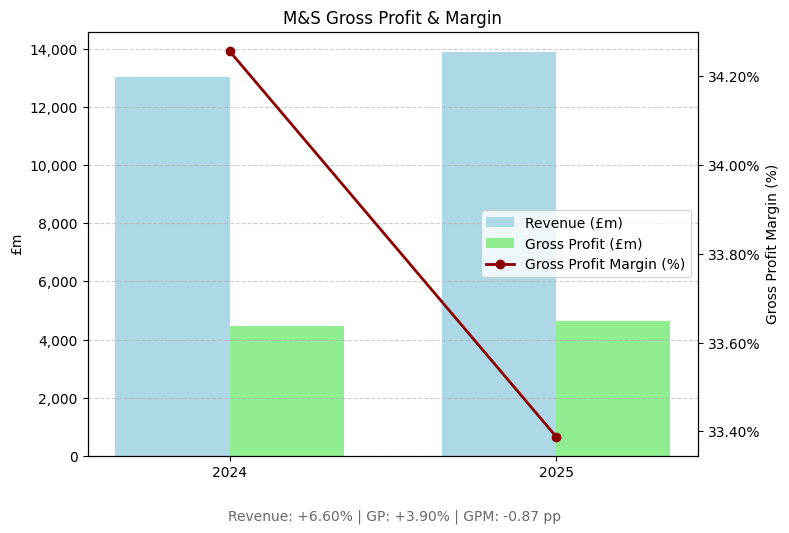

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, StrMethodFormatter

# Data
df = pd.DataFrame({
    "Year": [2024, 2025],
    "Revenue (£m)": [13040, 13900],
    "COGS (£m)": [8573, 9259]
})
df["Gross Profit (£m)"] = df["Revenue (£m)"] - df["COGS (£m)"]
df["Gross Profit Margin (%)"] = (df["Gross Profit (£m)"] / df["Revenue (£m)"]) * 100

# Graphic settings
fig, ax1 = plt.subplots(figsize=(8,5))

# Bars (Primary Axis - £)
bar_width = 0.35
x = range(len(df))
ax1.bar([i - bar_width/2 for i in x], df["Revenue (£m)"], width=bar_width, label="Revenue (£m)", color="lightblue")
ax1.bar([i + bar_width/2 for i in x], df["Gross Profit (£m)"], width=bar_width, label="Gross Profit (£m)", color="lightgreen")
ax1.set_ylabel("£m")
ax1.set_xticks(x)
ax1.set_xticklabels(df["Year"])
ax1.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

# line (Secondary Axis - %)
ax2 = ax1.twinx()
ax2.plot(x, df["Gross Profit Margin (%)"], marker="o", color="darkred", linewidth=2, label="Gross Profit Margin (%)")
ax2.set_ylabel("Gross Profit Margin (%)")
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=100))

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="upper left")

# percentage differences
rev_change = ((df["Revenue (£m)"].iloc[1] - df["Revenue (£m)"].iloc[0]) / df["Revenue (£m)"].iloc[0]) * 100
gp_change = ((df["Gross Profit (£m)"].iloc[1] - df["Gross Profit (£m)"].iloc[0]) / df["Gross Profit (£m)"].iloc[0]) * 100
gpm_change = df["Gross Profit Margin (%)"].iloc[1] - df["Gross Profit Margin (%)"].iloc[0]

# bottom text format
summary_text = f"Revenue: {rev_change:+.2f}% | GP: {gp_change:+.2f}% | GPM: {gpm_change:+.2f} pp"

# Add in Graph
fig.text(0.5, -0.05, summary_text, ha='center', fontsize=10, color="dimgray")

# Heading and Grid
plt.title("M&S Gross Profit & Margin")
ax1.grid(axis="y", linestyle="--", alpha=0.6)

# Legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc="right")

plt.tight_layout()
plt.show()

